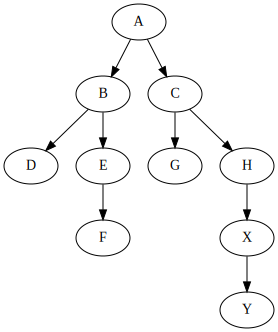

In [9]:
from graphviz import Graph, Digraph

g = Digraph()
g.edge("A", "B")
g.edge("A", "C")
g.edge("B", "D")
g.edge("B", "E")
g.edge("E", "F")
#g.edge("B", "G")
g.edge("C", "G")
g.edge("C", "H")
g.edge("X", "Y")
g.edge("H", "X")
g

Starting code:

# https://tinyurl.com/2p82uuvz

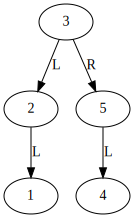

In [44]:
from graphviz import Digraph
from IPython.core.display import display

# Binary Search Trees
# Binary Trees that satisify the "BST Rule":
# for a given node, all it's descendants in the left sub tree have smaller values than that node, 
# AND all that node's descendants in it's right sub tree have bigger values than that node

class Node:
    def __init__(self, name):
        self.name = name
        self.left = None
        self.right = None

    # prints out all the node names
    def dump(self, indent):
        print("    "*indent + str(self.name))

        if self.left != None:
            self.left.dump(indent+1)

        if self.right != None:
            self.right.dump(indent+1)

    # recursive: draw edges+nodes
    def draw(self, gv):
        gv.node(str(self.name))
        if self.left != None:
            gv.edge(str(self.name), str(self.left.name), label="L")
            self.left.draw(gv)
        if self.right != None:
            gv.edge(str(self.name), str(self.right.name), label="R")
            self.right.draw(gv)
            
    # non-recursive, create a Digraph once
    def to_graphviz(self):
        gv = Digraph()
        self.draw(gv)
        return gv
    
    def search(self, target):
        if target == self.name:
            return True
        if self.left != None:
            if self.left.search(target):
                return True
        if self.right != None:
            if self.right.search(target):
                return True
        return False
    
    def bst_search(self, target):
        print("SEARCH THE FOLLOWING FOR", target)
        display(self.to_graphviz())
        if target == self.name:
            return True
        
        if target < self.name:
            if self.left != None:
                if self.left.bst_search(target):
                    return True            
        else:
            if self.right != None:
                if self.right.bst_search(target):
                    return True

        return False
    
    def add(self, name):
        if self.name == name:
            return # don't allow duplicates
        if name < self.name:
            # GO LEFT
            if self.left == None:
                self.left = Node(name)
            else:
                self.left.add(name)
        else:
            # GO RIGHT
            if self.right == None:
                self.right = Node(name)
            else:
                self.right.add(name)

def example_tree():
    root = Node(10)
    root.left = Node(2)
    root.left.left = Node(1)
    root.left.right = Node(4)
    root.left.right.left = Node(3)
    root.right = Node(15)
    root.right.left = Node(12)
    root.right.right = Node(19)
    root.left.right.right = Node(8)
    return root

#root = example_tree()
#print(root.bst_search(100))
root = Node(3)
for val in [2,5,1,4]:
    root.add(val)
root.to_graphviz()